# Análise de Correlação

A correlação é uma medida estatística que expressa a extensão na qual duas variáveis estão linearmente relacionadas. O coeficiente de correlação de Pearson é o mais comum e varia de -1 a +1.

- **+1**: Correlação positiva perfeita.
- **-1**: Correlação negativa perfeita.
- **0**: Nenhuma correlação linear.

Vamos usar `pandas` para calcular a matriz de correlação e `seaborn` para visualizá-la como um heatmap.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Criando um DataFrame de exemplo
np.random.seed(42)
data = {
    'Tamanho_Motor': np.random.uniform(1.0, 4.0, 100),
    'Cavalos_Potencia': [],
    'Preco_Veiculo': [],
    'Eficiencia_Combustivel': [],
    'Avaliacao_Seguranca': np.random.randint(1, 6, 100)
}

# Criando relações lógicas
data['Cavalos_Potencia'] = data['Tamanho_Motor'] * 50 + np.random.normal(0, 10, 100)
data['Preco_Veiculo'] = data['Cavalos_Potencia'] * 200 + data['Tamanho_Motor'] * 1000 + np.random.normal(0, 5000, 100)
data['Eficiencia_Combustivel'] = 60 / data['Tamanho_Motor'] + np.random.normal(0, 2, 100)

df = pd.DataFrame(data)

print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,Tamanho_Motor,Cavalos_Potencia,Preco_Veiculo,Eficiencia_Combustivel,Avaliacao_Seguranca
0,2.123620,97.805204,30591.116524,24.767067,1
1,3.852143,199.379007,40340.865904,17.714702,4
2,3.195982,178.522282,31156.294915,18.445843,5
3,2.795975,143.762512,29832.832538,25.180972,4
4,1.468056,67.146633,15816.660116,43.826882,5


In [13]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

print("\nMatriz de Correlação:")
df.corr()


Matriz de Correlação:


,Tamanho_Motor,Cavalos_Potencia,Preco_Veiculo,Eficiencia_Combustivel,Avaliacao_Seguranca
Tamanho_Motor,1.000000,0.973245,0.861268,-0.935340,0.158580
Cavalos_Potencia,0.973245,1.000000,0.873247,-0.911261,0.153341
Preco_Veiculo,0.861268,0.873247,1.000000,-0.816088,0.128272
Eficiencia_Combustivel,-0.935340,-0.911261,-0.816088,1.000000,-0.099849
Avaliacao_Seguranca,0.158580,0.153341,0.128272,-0.099849,1.000000


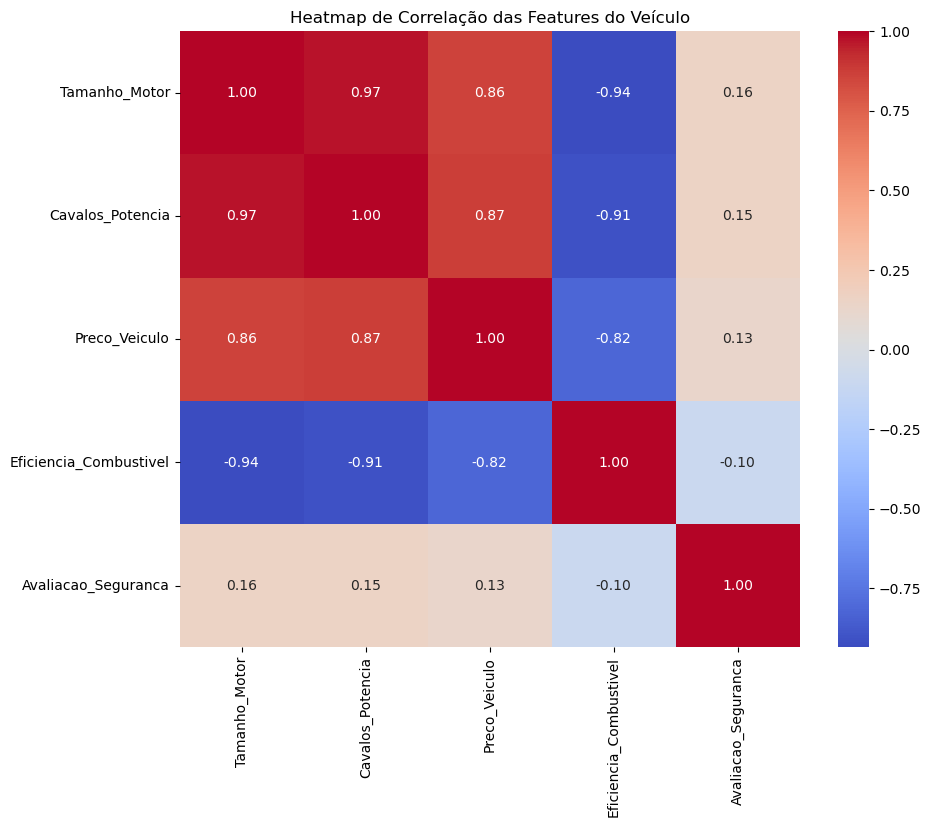

In [14]:
# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação das Features do Veículo')
plt.show()

### Interpretação do Heatmap

- Cores quentes (vermelho/laranja) indicam **correlação positiva forte**. Ex: `Cavalos_Potencia` e `Preco_Veiculo`.
- Cores frias (azul) indicam **correlação negativa forte**. Ex: `Tamanho_Motor` e `Eficiencia_Combustivel`.
- Cores próximas de zero (branco/cinza claro) indicam **baixa ou nenhuma correlação linear**. Ex: `Avaliacao_Seguranca` com as outras features.